In [45]:
import os
import cv2
import pickle

# Creating CSV of the Dataset

In [46]:
# Path to Dataset
path = "License-Plate-Recognition-master\Recognition\Dataset"

In [47]:
data = []
labels = []
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        # Reading Image
        image_path = os.path.join(path,folder,file)
        img = cv2.imread(image_path)
        # BGR -> Gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Loading data and labels
        data.append(gray)
        labels.append(folder)
# Saving Data and labels
pickle.dump(data, open("data.pickle", "wb"))
pickle.dump(labels, open("labels.pickle", "wb"))

In [50]:
print(len(data))

36576


In [51]:
print(len(labels))

36576


# Loading Data

In [52]:
import numpy as np
d = open("data.pickle","rb")
data = pickle.load(d)

In [53]:
data = np.array(data)

# Loading labels

In [54]:
# Diction of all classes
alphabets_dic = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
             20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1', 28: '2', 29:'3',
             30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'}

In [55]:
# Loading the labels
l = open("labels.pickle","rb")
labels = pickle.load(l)

In [56]:
# Converting classes to integers
labels_integer = []
count = 0
for i in labels:
    for j in range(len(alphabets_dic)):
        if alphabets_dic[j] == i:
            labels_integer.append(j)

#One hot Encoder

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, lbls, test_size=0.20, random_state=42)

In [59]:
X_train = X_train.reshape(29260,28,28,1)
X_test = X_test.reshape(7316,28,28,1)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

In [63]:
# model Summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)         

In [64]:
# Loss = "categorical_crossentropy"
# Optimizer = "Adam"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
458/458 [==============================] - 204s 356ms/step - loss: 3.2434 - accuracy: 0.1780 - val_loss: 0.4241 - val_accuracy: 0.8855
Epoch 2/10
458/458 [==============================] - 158s 344ms/step - loss: 0.7418 - accuracy: 0.7783 - val_loss: 0.2841 - val_accuracy: 0.9262
Epoch 3/10
458/458 [==============================] - 152s 332ms/step - loss: 0.4763 - accuracy: 0.8605 - val_loss: 0.2235 - val_accuracy: 0.9351
Epoch 4/10
458/458 [==============================] - 154s 337ms/step - loss: 0.3828 - accuracy: 0.8902 - val_loss: 0.1881 - val_accuracy: 0.9415
Epoch 5/10
458/458 [==============================] - 160s 350ms/step - loss: 0.3340 - accuracy: 0.9026 - val_loss: 0.1710 - val_accuracy: 0.9486
Epoch 6/10
458/458 [==============================] - 151s 328ms/step - loss: 0.2857 - accuracy: 0.9180 - val_loss: 0.1651 - val_accuracy: 0.9511
Epoch 7/10
458/458 [==============================] - 143s 313ms/step - loss: 0.2628 - accuracy: 0.9199 - val_loss: 0.1707 -

In [66]:
model.save('cnn_classifier.h5')

In [67]:
import matplotlib.pyplot as plt

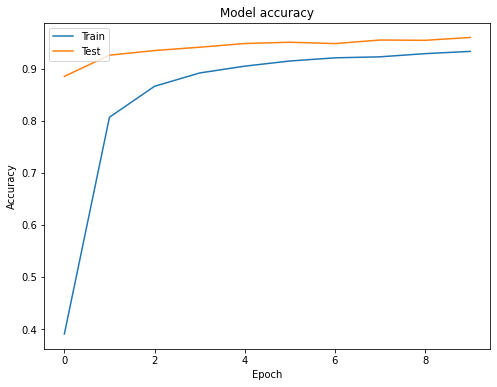

In [68]:
# Accuracy
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

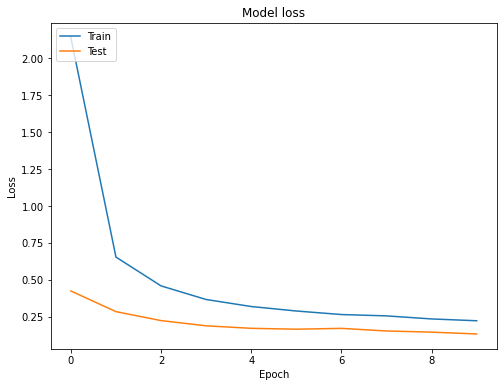

In [69]:
# Loss
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Loss.png")
plt.show()